+ Hello,

+ In this worksheet we will try to locate the license plate on the vehicle image.

+ Plate location will be based on a randomly selected photo, not on all images. The method can be generalized to other images by following the steps below.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

In [2]:
def image_read(image1, image2, title1 = "", title2 = ""):
    fig = plt.figure(figsize = (15, 15))
    ax1 = fig.add_subplot(121)
    ax1.imshow(image1, cmap = "gray")
    ax1.set(xticks = [], yticks = [], title = title1)
    ax2 = fig.add_subplot(122)
    ax2.imshow(image2, cmap = "gray")
    ax2.set(xticks = [], yticks = [], title = title2)

In [3]:
path = "Car_number_plate6.jpg"

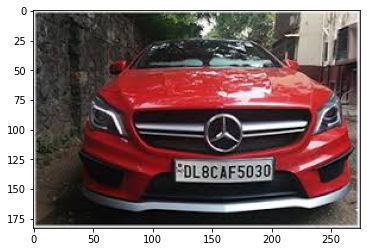

In [4]:
image = plt.imread("Car_number_plate6.jpg")
plt.imshow(image)

+ Let's start by drawing any picture we choose on the graph.

+ We create a function called image read and tell it to get 2 images and 2 titles. The reason there are two pictures is that we can compare the pictures with each other.

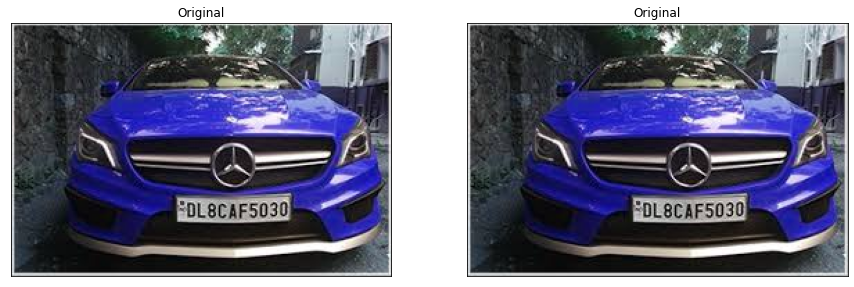

In [5]:
image = cv2.imread(path)
plot_image = image_read(image, image, title1 = "Original", title2 = "Original")

+ After receiving the picture, we change its format. We switch from RGB image to Black and White image. This is because operations are simpler and easier than black-and-white images. Images with normal RGB colors have 3 channels, while black and white images have 1 channel. Black and white image is preferred because it is easier to use.

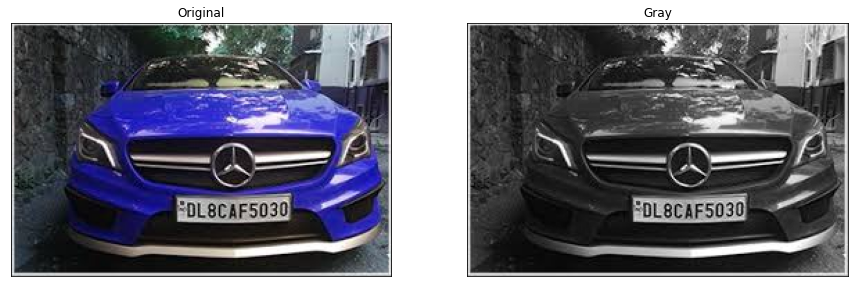

In [6]:
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

image_read(image, gray, title1 = "Original", title2 = "Gray")

+ After converting it to a black and white image, we make the picture blurred. The reason for this is to clear the noise on the picture. When the noise of the picture is cleared, the edge and corner lines become sharper, and the benefit of this is that it enables the selection of independent objects in the picture more easily, for example, the places where the car starts in the picture are clearer compared to the first picture, and the plate is more prominent in the second picture than in the first picture. Not to be confused, clarity is not meant by prominent, but by salience, it refers to the differentiation within the image.

+ Bilateral filter in cv2 was used for noise removal.

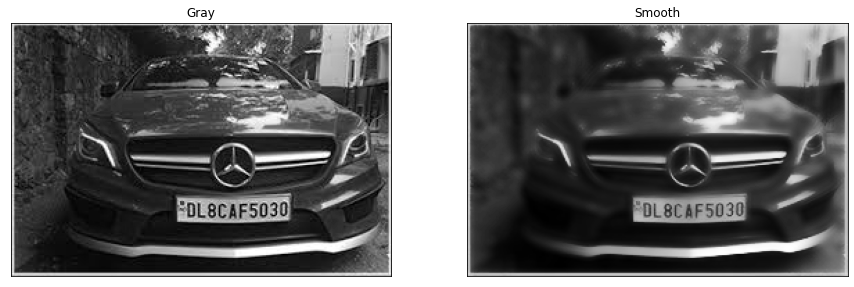

In [7]:
smooth = cv2.bilateralFilter(gray, 9, 75, 75)

image_read(gray, smooth, title1 = "Gray", title2 = "Smooth")

+ The process of drawing edges and corners after defocusing. As seen below, edges and corners are clearer in a blurred image. If the original version of the picture is used, the edges and corners of other objects in the image background or shadows reflecting on the vehicle will be drawn, thus creating a more complex image.

+ Again, I use Canny in cv2 to draw edges and corners. The Canny function takes an image, a minimum threshold value, and a maximum threshold value as a parameter. The meaning of the minimum and maximum threshold values ​​is: it determines which of all the drawn edges are real edges and which are not real edges. For example, there are a lot of trees in the background of the picture, if we keep the max threshold value small, the image will find more edges in the background, which will make the image more confused. At the same time, keeping the max threshold value too high may cause no edge and corner to be found in the plate area.

+ If the edge-corner density is above the max threshold, it is definitely an edge, if the edge-corner density is below the min threshold, this is definitely not an edge.

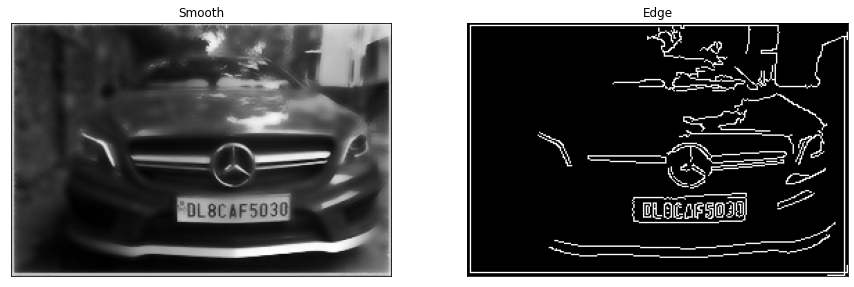

In [8]:
edge = cv2.Canny(smooth, 70, 400)
image_read(smooth, edge, title1 = "Smooth", title2 = "Edge")

+ After the edge-corner detection, we came to the contour process. The logic here connects all continuous points of the same color and density along their borders. In short, we can say that it frames the edges and corners.

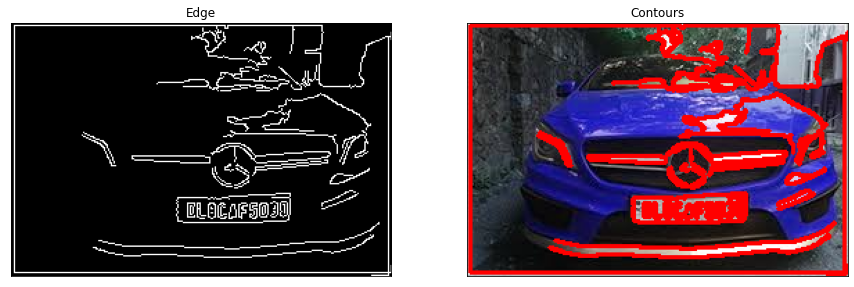

In [9]:
contours, new = cv2.findContours(edge.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

image_copy = image.copy()

_ = cv2.drawContours(image_copy, contours, -1, (255, 0, 0), 2)

image_read(edge, image_copy, title1 = "Edge", title2 = "Contours")


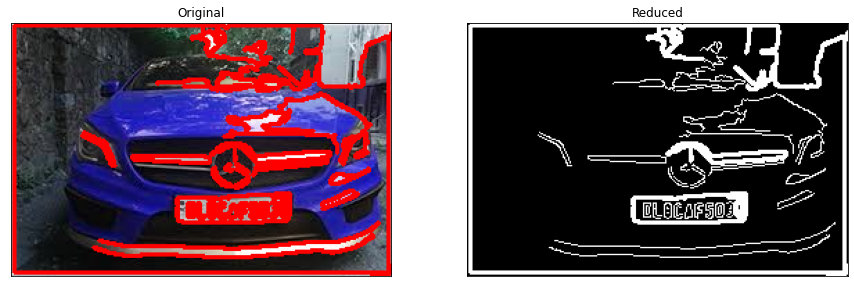

In [10]:
contours = sorted(contours, key = cv2.contourArea, reverse = True)[:5]

image_reduced = edge.copy()
_ = cv2.drawContours(image_reduced, contours, -1, (255, 0, 0), 2)

image_read(image_copy, image_reduced, title1 = "Original", title2 = "Reduced")

 + In the last stage, we calculate the lengths of the process for the 5 contours we have taken above and determine the coordinates on the picture for the contour that resembles a rectangle (plate shape) between them. After the coordinates are determined, the area of ​​these coordinates on the picture is cut off, leaving the area that is likely to belong to the plate.

+ It is useful to say again that these threshold values ​​and the maximum number of contours are valid for this picture. It can also work on other images in the data, but using the same values ​​in all of them does not guarantee that it will return the plate correctly every time.

In [11]:
plate = None

for i in contours:
    a = cv2.arcLength(i, True)
    edge_count = cv2.approxPolyDP(i, 0.02 * a, True)
    if len(edge_count) == 5:
        x, y, w, h = cv2.boundingRect(i)
        plate = image[y:y+h, x:x+w]
        break

cv2.imwrite("plate.jpg", plate)

True

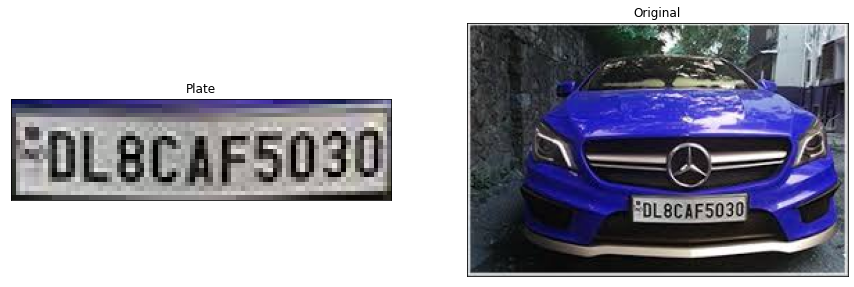

In [12]:
image_read(plate, image, title1 = "Plate", title2 = "Original")

In [18]:
def plot_images(img1):
    fig = plt.figure(figsize=[10,10])
    ax1 = fig.add_subplot(111)     # one row two columns and targeting the first column
    ax1.imshow(img1,cmap='gray')
    ax1.set(title="Plate Image")   # 

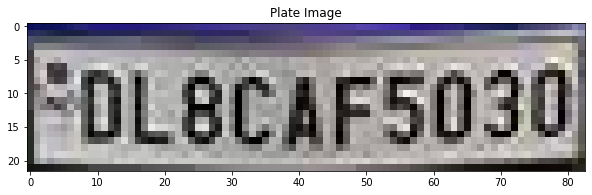

In [19]:
plot_images(plate)